# COMPUTATIONAL ANALYSIS
Here you will compute physiological data based on multicompartmental modeling. We start with a ball-and-stick model, and move on to the cell model from Almog & Korngreen (2014) (http://www.jneurosci.org/content/34/1/182.long).

## How to use Ipython Notebook:
You can modify the parameters in the code blocks bellow, and run the code by pressing Shift + Enter.

While the computer is busy executing the code, a "Kernel busy" message will be visible on the top. When this message disappears, it is done, and the figure will reapear if something was plotted. 

## Ball and stick neuron

In [1]:
# Initialize and prepare
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
os.system('nrnivmodl')
import pylab as plt
import neuron
h = neuron.h

# Specially interested users are encuraged to also modify the following file, to access more parameters.
from CompAnalysis import *  

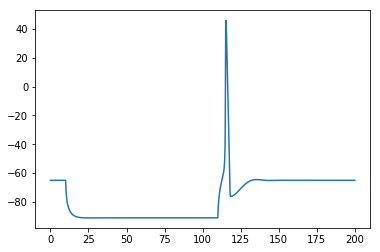

In [2]:
soma = h.Section('soma')
soma.L = 15  # um; stored as a float number
soma.diam = 15  # um
soma.nseg = 1  # Number of discrete segments. Stored as an integer

dend = h.Section('dend')
dend.L = 1000
dend.diam = 2
dend.nseg = int(dend.L/10)

dend.connect(soma, 1, 0)

dend.insert('hh')
soma.insert('hh')
        
# Making stimulation
input_site = dend(0.)
stim = h.IClamp(input_site)
stim.delay = 10
stim.amp = -0.5
stim.dur = 100

# What to record
recording_site = soma(0.5)
t = h.Vector()
t.record(h._ref_t)
v = h.Vector()
v.record(recording_site._ref_v)

h.dt = 2**-4
h.finitialize(-65)
neuron.init()
neuron.run(200)

plt.plot(t, v)
plt.show()

del soma, dend, stim, recording_site, input_site, t, v

## Somatic and dendritic spikes
 In this exercise you will look at somatic and dendritic spikes by changing the 'amp' parameter for the somatic and apical input. You might benefit more from this exercise if you have some knowledge of the paper from Almog & Korngreen (2014).
 
 1. How much somatic input is required to have 
  * only a somatic spike
  * both a somatic and a dendritic spike
 2. How much apical input is required to have 
  * only a dendritic spike
  * both a dendritic and a somatic spike
 3. Now use current input at both positions. What is the minimum total amount of current you need to get both dendritic and somatic spiking? 
  * How are they distributed?

	1 
	1 


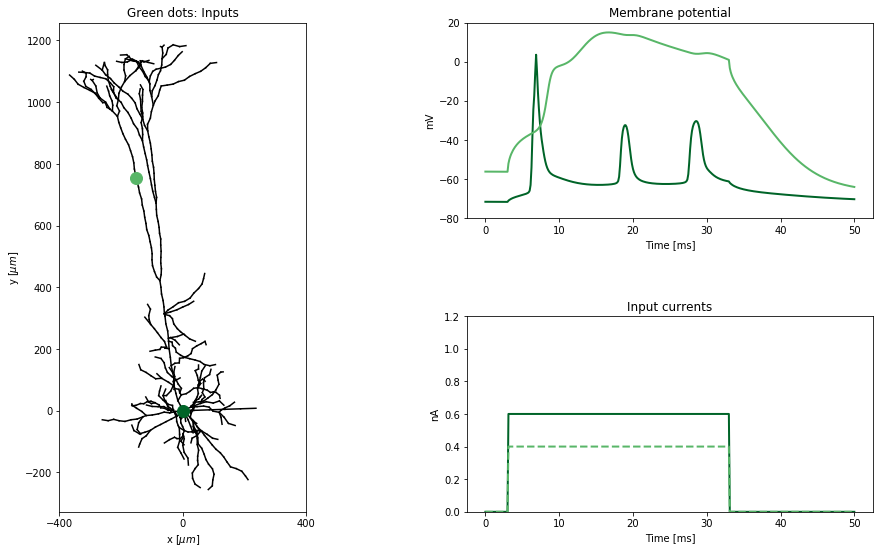

In [3]:


# Parameters for step pulse input to soma and apical dendrite
soma_clamp_params = {
    'idx': 0,  # Cell index of soma
    'record_current': True,
    'amp': 0.6, # [nA] Current injected in soma
    'dur': 30., # [ms] Duration of pulse
    'delay': 3, # [ms] Delay before pulse onset
    'pptype': 'IClamp',
    }
apic_clamp_params = {
    'record_current': True,
    'amp': 0.4,  # [nA] Current injected in apical dendrite
    'dur': 30., # [ms] Duration of pulse
    'delay': 3, # [ms] Delay before pulse onset
    'pptype': 'IClamp',
    }

exercise1(soma_clamp_params, apic_clamp_params)

## Extracellular spikes
This exercise uses LFPy (http://lfpy.github.io/) to calculate the extracellular potential based on the cell model from the previous exercise.

  * Compare the extracellular spikes with and without a noise-level of 15 µV
  * By simple visual inspection, roughly how far away from the soma is the spike visible?
  * Look at different positions around soma. Heights, distances etc. How does the spike change? 
  * Is it possible to see the dendritic spike on the recordings? If not, can you explain why?


/home/tone/progs/LFPy/LFPy/recextelectrode.py:317: UserWarning: Membrane currents do not sum to zero
  warnings.warn('Membrane currents do not sum to zero')


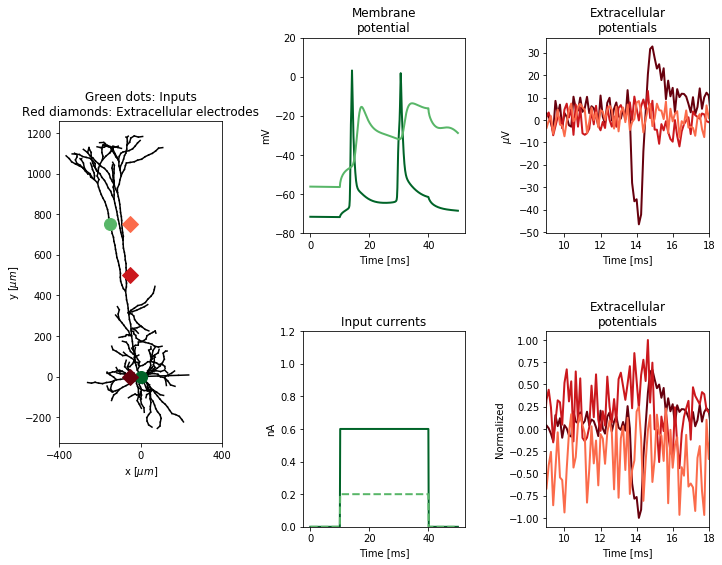

In [4]:
blockPrint()

# Parameters for step pulse input to soma and apical dendrite
soma_clamp_params = {
    'idx': 0,  # Cell index of soma
    'record_current': True,
    'amp': 0.6, # [nA] Current injected in soma
    'dur': 30., # [ms] Duration of pulse
    'delay': 10, # [ms] Delay before pulse onset
    'pptype': 'IClamp',
    }
apic_clamp_params = {
    'record_current': True,
    'amp': 0.2,  # [nA] Current injected in apical dendrite
    'dur': 30., # [ms] Duration of pulse
    'delay': 10, # [ms] Delay before pulse onset
    'pptype': 'IClamp',
    }

# Making x,y,z coordinates of three electrodes
elec_x = np.array([-50., -50., -50.])
elec_y = np.array([0., 500., 750.])
elec_z = np.array([0.0, 0.0, 0.0])
electrode_parameters = {
    'sigma': 0.3,       # extracellular conductivity
    'x': elec_x,        # x,y,z-coordinates of contact points
    'y': elec_y,
    'z': elec_z,
}
noise_level = 15 # [uV] Noise level that is added to extracellular recordings

exercise2(soma_clamp_params, apic_clamp_params, electrode_parameters, noise_level)

## Deep Brain Stimulation
You will now look at how a single cell reacts to current injected in the extracellular medium. You can change the position, amplitude and duration of the pulse.

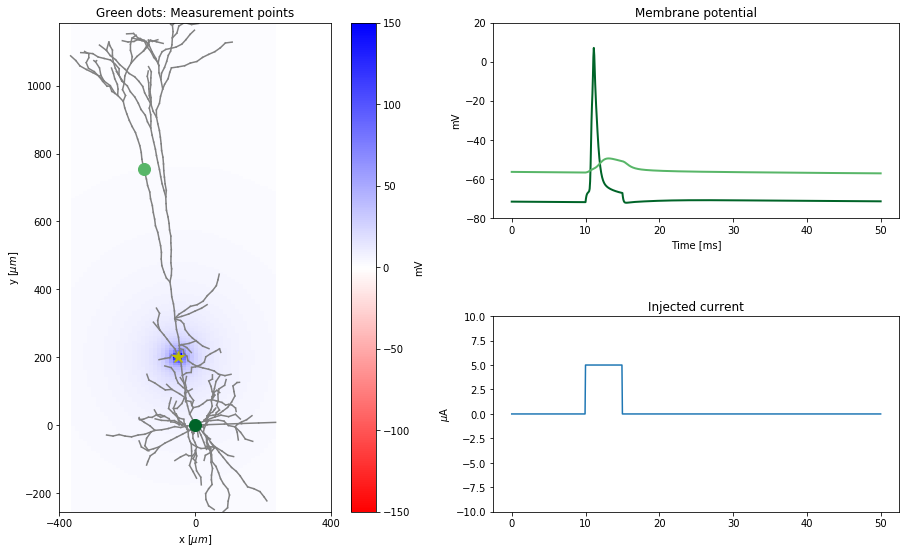

In [5]:
dbs_params = {'position': [-50., 200., 0.],
              'amp': 5, # uA,
              'start_time': 10.,
              'end_time': 15.,
              }
exercise_DBS(dbs_params)

## Single cell LFPs
We will now look at a cross section of the LFP (i.e. no spiking) stemming from a single synaptic input to either a cortical L5 pyramidal cell, or a Fast Spiking Basket Cell. The LFP is shown for a snapshot in time when the somatic membrane potential is at its maximum. 

 * Look at the LFP around a pyramidal cell (model='almog'). Could this single cell LFP be experimentally measured? Hint: Compare to spike and noise level from previous exercise.
 * Try a few different input positions (input_y_pos), and look at how the shape of the LFP changes. Usefull concepts here are dipoles versus multipoles.


/home/tone/progs/LFPy/LFPy/recextelectrode.py:317: UserWarning: Membrane currents do not sum to zero
  warnings.warn('Membrane currents do not sum to zero')
/home/tone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-65.0, top=-65.0
  'bottom=%s, top=%s') % (bottom, top))


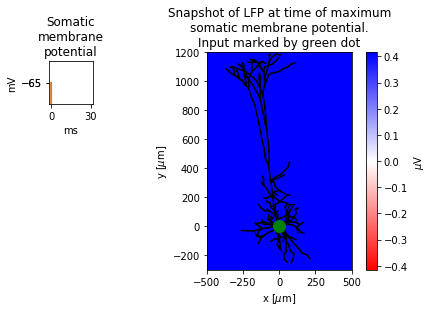

In [6]:
input_y_pos = 10
model = 'almog'  # This should be either 'FS_basket' or 'almog'
exercise3(model, input_y_pos)

 * Look at the LFP in a cross-section plane around a Fast Spiking Basket cell (model='FS_basket'). Try a few different positions. How does the LFP distribution change?


/home/tone/progs/LFPy/LFPy/recextelectrode.py:317: UserWarning: Membrane currents do not sum to zero
  warnings.warn('Membrane currents do not sum to zero')
/home/tone/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-65.0, top=-65.0
  'bottom=%s, top=%s') % (bottom, top))


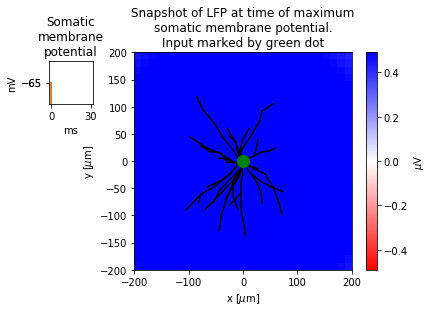

In [7]:
input_y_pos = 0
model = 'FS_basket'  # This should be either 'FS_basket' or 'almog'
exercise3(model, input_y_pos)

 * The LFP mostly stems from a very large number of synaptic inputs to thousands of cells. From the single cell LFPs you have seen for these two cell types, can you speculate which will have the largest contribution to the LFP? (Hint 1: Amplitude decay with distance. Hint 2: Cell orientation)

## LFP in the frequency domain

Here we will look at the single cell LFP stemming from white noise input to a cortical L5 pyramidal cell. White noise input means equal amplitude at all frequencies (i.e. equally much slow changes as fast changes) in the input current. The top row shows the normal time signals, and the bottom row shows the same signals with amplitude as a function of frequency.

* How does the frequency spectrum of the LFP change with increasing distance from the input? Can you explain the effect that you see?

More information on this can be found in this modelling study:
http://link.springer.com/article/10.1007%2Fs10827-010-0245-4

/home/tone/progs/LFPy/LFPy/recextelectrode.py:317: UserWarning: Membrane currents do not sum to zero
  warnings.warn('Membrane currents do not sum to zero')


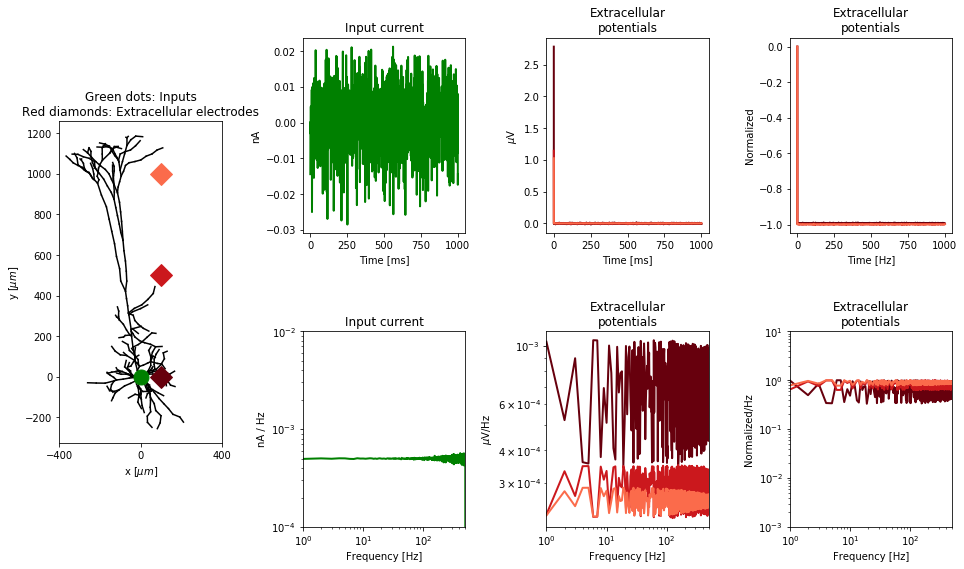

In [8]:
input_y_pos = 0

# Making x,y,z coordinates of three electrodes
elec_x = np.array([100., 100., 100.])
elec_y = np.array([0., 500., 1000.])
elec_z = np.array([0.0, 0.0, 0.0])
electrode_parameters = {
    'sigma': 0.3,       # extracellular conductivity
    'x': elec_x,        # x,y,z-coordinates of contact points
    'y': elec_y,
    'z': elec_z,
}
exercise4(electrode_parameters, input_y_pos)